In [26]:
import os
import cv2
import numpy as np

# Specify the directory containing face images
# Use the absolute path if the directory is not in the same location as the script
dir_name = "C:\\Users\\abhin\\Downloads\\dataset\\dataset\\faces"

y = []
x = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

# Verify if the directory exists
if not os.path.exists(dir_name):
    print(f"The directory {dir_name} does not exist. Please check the path.")
else:
    for person_name in os.listdir(dir_name):
        dir_path = os.path.join(dir_name, person_name)
        if os.path.isdir(dir_path):  # Ensure it's a directory
            class_names.append(person_name)
            for image_name in os.listdir(dir_path):
                image_path = os.path.join(dir_path, image_name)
                img = cv2.imread(image_path)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                resized_image = cv2.resize(gray, (h, w))
                v = resized_image.flatten()
                x.append(v)
                n_samples += 1
                y.append(person_id)
                target_names.append(person_name)
            person_id += 1

    y = np.array(y)
    x = np.array(x)
    target_names = np.array(target_names)
    n_features = x.shape[1]

    print(y.shape, x.shape, target_names.shape)
    print("Number of samples:", n_samples)

    n_classes = len(class_names)

    print("Total dataset size:")
    print("n_samples: %d" % n_samples)
    print("n_features: %d" % n_features)
    print("n_classes: %d" % n_classes)


(450,) (450, 90000) (450,)
Number of samples: 450
Total dataset size:
n_samples: 450
n_features: 90000
n_classes: 9


Extracting the top 150 eigenfaces from 337 faces


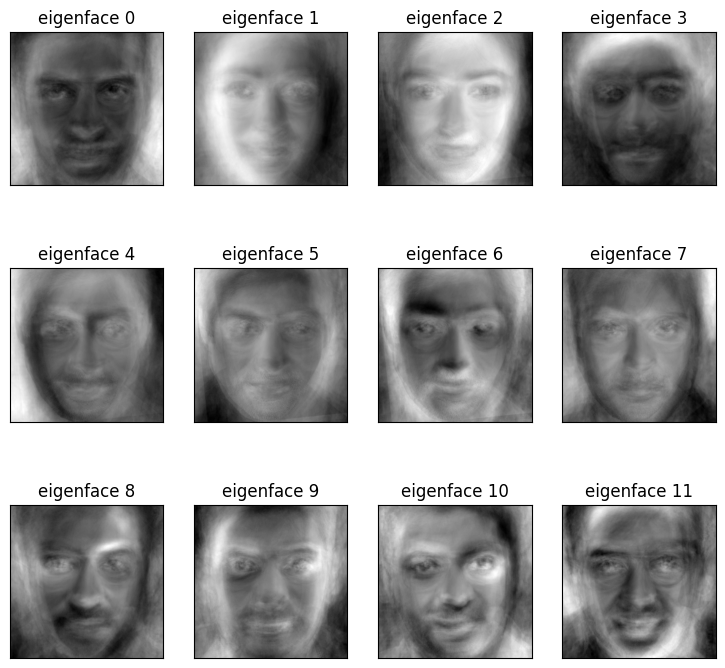

Projecting the input data on the eigenfaces orthonormal basis
(337, 150) (113, 150)
Project done...


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

n_components = 150

print("Extracting the top %d eigenfaces from %d faces"% (n_components, x_train.shape[0]))

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(x_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

eigenfaces_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenfaces_titles, h, w)

plt.show()

print("Projecting the input data on the eigenfaces orthonormal basis")
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape,x_test_pca.shape)

lda = LinearDiscriminantAnalysis()
lda.fit(x_train_pca, y_train)

x_train_lda = lda.transform(x_train_pca)
x_test_lda = lda.transform(x_test_pca)
print("Project done...")

In [ ]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
import numpy as np
import os,cv2

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h,w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [ ]:
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(10,10), max_iter=1000, verbose=True).fit(x_train_lda, y_train)
print("Model weights:")
model_info = [coef.shape for coef in clf.coefs_]
print(model_info)

Accuracy 70.79646017699115


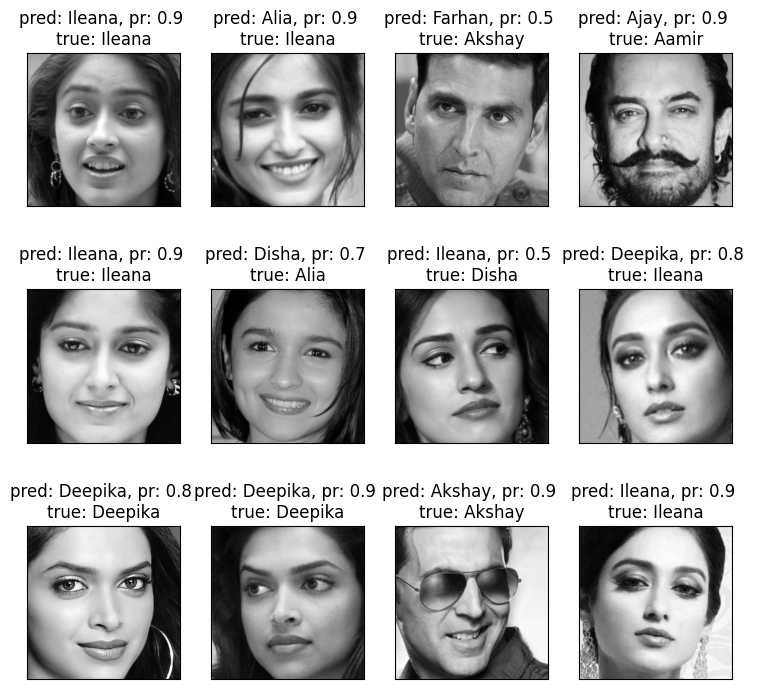

In [30]:
y_pred=[];y_prob=[]
for test_face in x_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]
    y_pred.append(class_id)
    y_prob.append(np.max(prob))
    
y_pred = np.array(y_pred)

prediction_titles=[]
true_positive = 0
for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)
    prediction_titles.append(result)
    if true_name==pred_name:
       true_positive =true_positive+1
    
print("Accuracy",true_positive*100/y_pred.shape[0])

plot_gallery(x_test, prediction_titles, h, w)
plt.show()